In [1]:
from torchvision import transforms

net1_data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(64),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Grayscale(),
        transforms.ToTensor()
        
    ]),
    'val': transforms.Compose([
        transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
    
    'test': transforms.Compose([
        transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
}
%matplotlib inline

Creating Net1.
188
70
x:512	y:32	width:64	height:64	text:	confidence:-5.2001843869220465e-05	level:2	isAnnotation:True
x:512	y:32	width:64	height:64	text:	confidence:-5.2001843869220465e-05	level:2	isAnnotation:True
x:640	y:32	width:64	height:64	text:	confidence:-3.4703985875239596e-05	level:2	isAnnotation:True
x:416	y:96	width:64	height:64	text:	confidence:-9.040629083756357e-05	level:2	isAnnotation:True
x:672	y:96	width:64	height:64	text:	confidence:-2.1591899894701783e-06	level:2	isAnnotation:True
x:384	y:192	width:64	height:64	text:	confidence:-0.00017645323532633483	level:2	isAnnotation:True
x:160	y:224	width:64	height:64	text:	confidence:-1.0311371312354822e-08	level:2	isAnnotation:True
x:96	y:256	width:64	height:64	text:	confidence:-3.4854434488806874e-05	level:2	isAnnotation:True
x:128	y:256	width:64	height:64	text:	confidence:-4.603808179126645e-08	level:2	isAnnotation:True
x:160	y:256	width:64	height:64	text:	confidence:-1.6916281708745373e-09	level:2	isAnnotation:True
x:192	

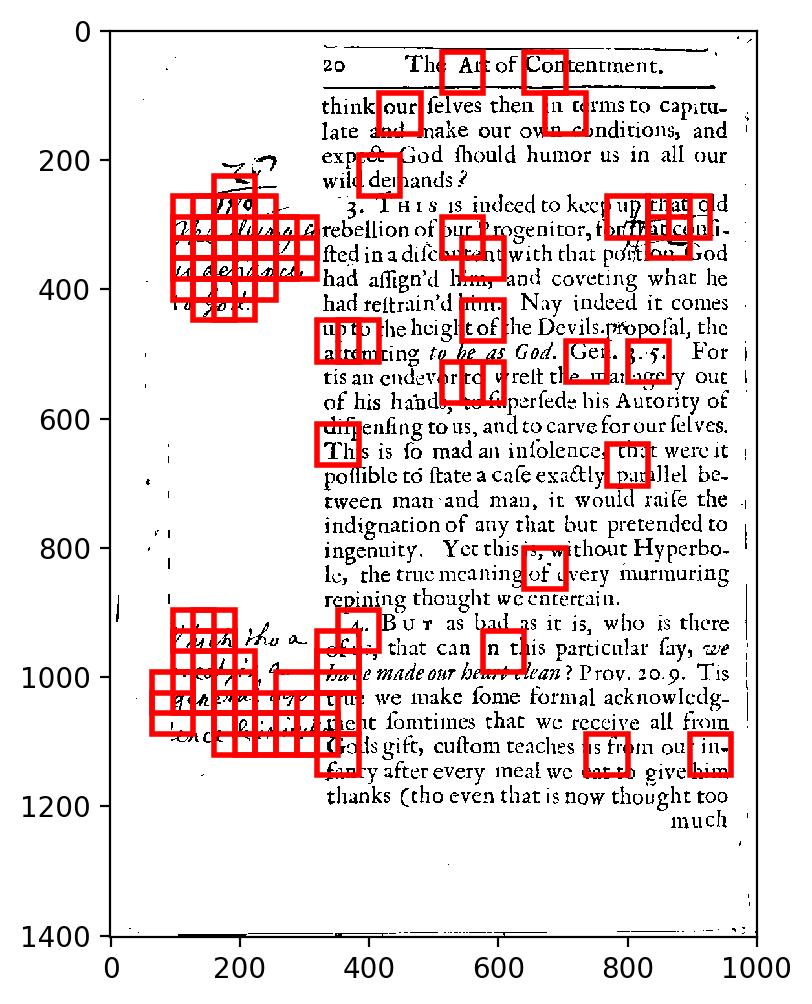

In [2]:

import sys
import os
sys.path.append(os.path.abspath('../../../'))
from detection.lib.model.ImageROI import ImageROI
from PIL import Image
import numpy as np
import torch

# book_data_dir = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images'
# img_loc = book_data_dir + '/Dryden/positive/307.png'
# Testing with image of dimensions 1000x1381

img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'
pilimg = Image.open(img_loc)
w, h = pilimg.size
imgrois = [ImageROI(0, 0, w, h)]
imgarr = np.asarray(pilimg)

from model_utils import create_model_architecture
from bounding_box_classification import get_pos_rois
# net1 = Net1()
net1 = create_model_architecture('net1', use_gpu = False)
# net1.load_state_dict(torch.load('models/net1-IAM-1.pt'))
net1.load_state_dict(torch.load('models/net1-aa_64-500.pt'))


# Modify this as necessary
# imgrois = [ImageROI(0, 0, 1000, 700), ImageROI(0, 750, 1000, 500)]
net1.train(False)
with torch.set_grad_enabled(False):
    pos_rois = get_pos_rois(net1,
                            (img_loc, imgrois),
                            model_transform = net1_data_transforms['test'],
                            model_input_size = (64,64),
                            stride=(32, 32))

# for rois in pos_rois:
#     for roi in rois:
#         print(roi.toString())
        
all_rois = [roi for rois in pos_rois for roi in rois]
confs = [roi.confidence for roi in all_rois]



#print(confs)
# import matplotlib.pyplot as plt

# n, bins, patches = plt.hist(confs,908)
# plt.show()
    
# print(bins)





print(len(all_rois))
threshold = -7.58074643e-04
thresholded_rois = [roi for roi in all_rois if roi.confidence >= threshold]
print(len(thresholded_rois))
print(thresholded_rois[0].toString())



from detection.lib.utils.Utils import plt_img
plt_img(imgarr, rois=[(thresholded_rois, 'r')])#, roi_level_set=roi_level_set)





#print('number of pos ROIs found', len(all_rois))

# from detection.lib.ImgProcessor import ImgProcessor
#from detection.lib.utils.Utils import plt_img
# plot the rois and plot only certain information according to the set
# imgProcessor = ImgProcessor()
# img = imgProcessor.loadImage(inFilename=img_loc)
# roi_level_set = set([1])
#plt_img(imgarr, rois=[(all_rois, 'r')])#, roi_level_set=roi_level_set)

In [3]:
print("done plotting regions of interest")

done plotting regions of interest
